In [1]:
# Import necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from matplotlib import cm
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from helper_functions import date_to_decimal_year, eruption_counter, rain_predictor, rain_plotter

In [2]:
# Create path to data
folder_env_variable = 'MY_FOLDER_PATH'
default_folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

folder_path = os.environ.get(folder_env_variable, default_folder_path)

In [3]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

Eruption data must have columns: 'Volcano' and 'Start'. 'Start' is the beginning date of the eruption given as a string-- YYYY-MM-DD.

Rainfall data must have columns: 'Date', 'Longitude', 'Latitude', and 'Precipitation'. 'Date' is given as a string YYYY-MM-DD and the other three columns are floats.

In [4]:
volcanos = {'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.55, -.35, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.35, -.95, 'Cerro Azul') } # Long/lat pairs must exist in rainfall data
quantiles = 4 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
scale = True # If true, applies a log scaling to the data
elninos = {'very strong':[['2015-09-01', '2016-02-29']], 'strong':[['2009-11-01', '2010-02-27'], ['2015-06-01', '2015-08-31'], ['2016-03-01', '2016-04-30']]} # Enter El Nino events of interest as two element lists of start/end dates

if elninos != None:
    for j in elninos:
        for i in elninos[j]:
            i[0] = date_to_decimal_year(i[0])
            i[1] = date_to_decimal_year(i[1])
# Uncomment below to use rain predictor location

# compare_site = ayora  # Choose ayora or bellavista to compare rainfall to
# print_summary = False # Make true if you want to see summary of regression
# rainfall = rain_predictor(rainfall, volcanos, compare_site, rolling_number, print_summary)
# elninos = [['2015-08-01', '2016-03-31'], ['1997-08-01', '1998-02-27'], ['1965-09-01', '1965-12-31'], ['1972-10-01', '1973-01-31'], ['1982-09-01', '1983-02-27']] # Enter El Nino events of interest as two element lists of start/end dates

We look at rolling averages of rainfall at each volcano site. We group dates at each volcano into quantiles based on the rolling rain averages. In gray, we've included the cumulative precipitation.

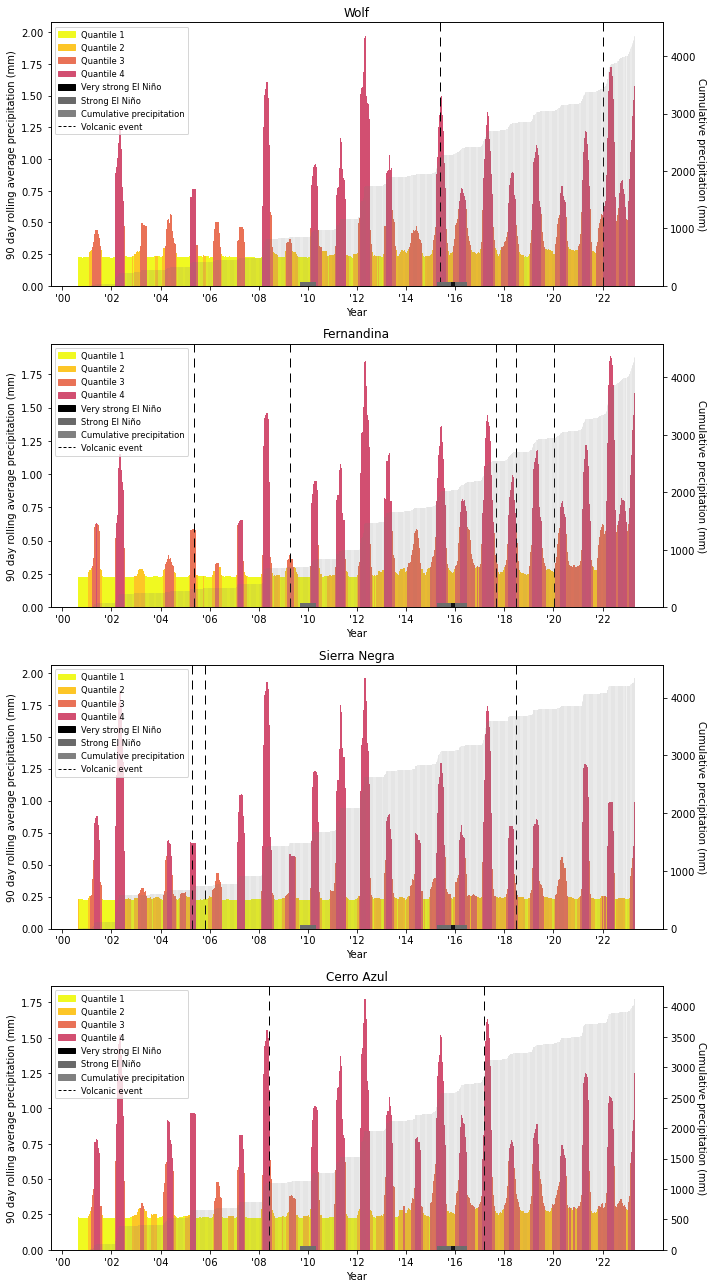

In [5]:
# Can remove eruptions as an input (if desired)

rain_plotter('bar', volcanos, rainfall, quantiles, rolling_number, scale, eruptions, elninos)

Below we break up eruptions into quantiles, first all together, and then by individual volcano.

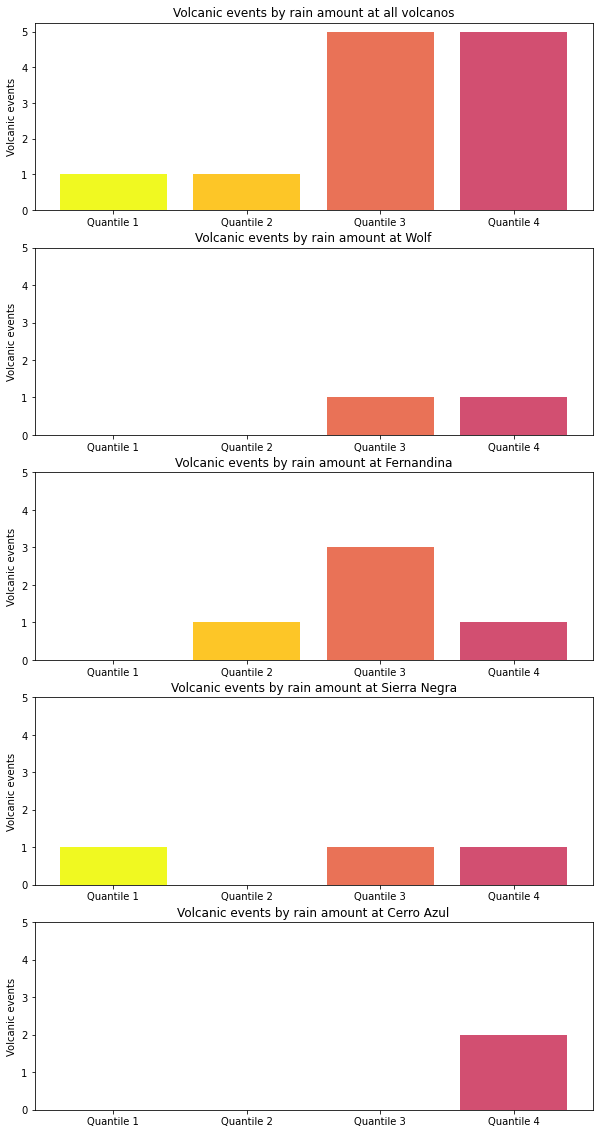

array([1., 1., 5., 5.])

In [5]:
eruption_counter(volcanos, eruptions, rainfall, quantiles, rolling_number)

Below, we plot rainfall at the volcano sites by year.

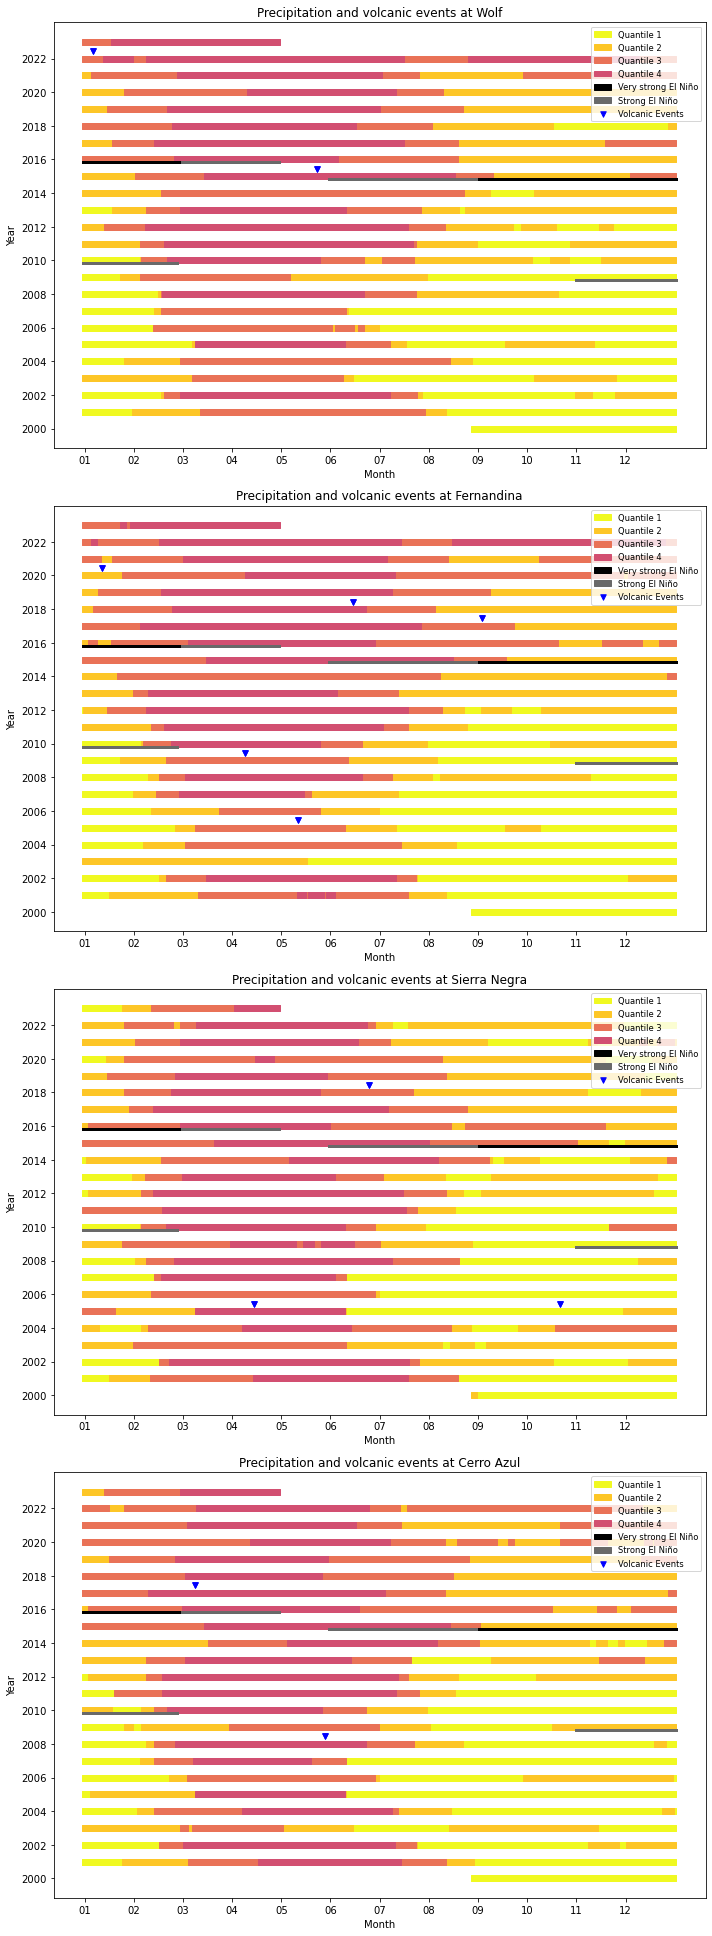

In [6]:
# Can remove eruptions and elninos as inputs (if desired)

rain_plotter('annual', volcanos, rainfall, quantiles, rolling_number, scale, eruptions, elninos)